<a href="https://colab.research.google.com/github/sowmR/PythonMachingLearning/blob/main/Practice_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

This dataset will give us flight delay data from all flights departing from the three NYC airports (JFK, LGA, EWR) in the year 2013.

In [2]:
df = pd.read_csv('https://s3.amazonaws.com/elephantscale-public/data/nycflights13/flights.csv.gz')


In [3]:
df.head(5)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


In [11]:
df.shape

(336776, 19)

Find average delay by Month

In [4]:
mean_delay_by_month = df.groupby(['month'])['arr_delay'].mean()
mean_delay_by_month

month
1      6.129972
2      5.613019
3      5.807577
4     11.176063
5      3.521509
6     16.481330
7     16.711307
8      6.040652
9     -4.018364
10    -0.167063
11     0.461347
12    14.870355
Name: arr_delay, dtype: float64

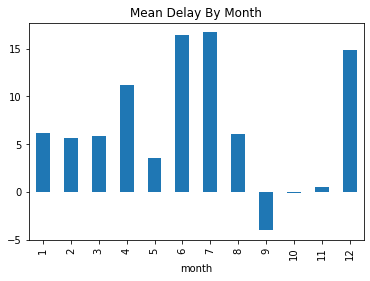

In [5]:
mean_month_plt = mean_delay_by_month.plot(kind='bar', title="Mean Delay By Month")
mean_month_plt

Two months have negative delay times. 

now lets check the delay by month for airports as certain airports may have different results.

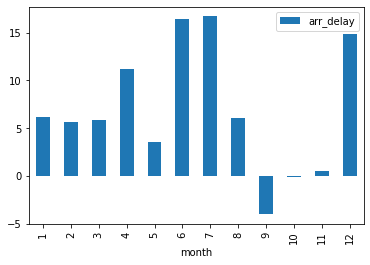

In [6]:
df[['arr_delay', 'month']].groupby('month').mean().plot(kind='bar')

chicago airport  = ORD

In [7]:
mean_delay_by_month_ord = df[(df.dest == 'ORD')].groupby(['month'])['arr_delay'].mean()
mean_delay_by_month_ord

month
1      7.287694
2      3.680794
3     -2.702473
4     19.179352
5      7.938280
6     13.299376
7      8.405514
8      4.256851
9     -4.745370
10    -1.597090
11     2.071058
12    16.462817
Name: arr_delay, dtype: float64

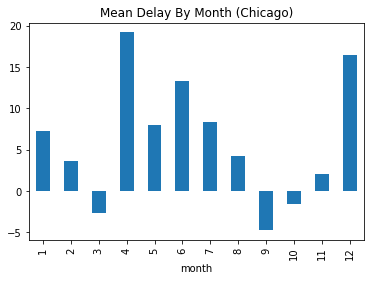

In [8]:
mean_month_plt_ord = mean_delay_by_month_ord.plot(kind='bar', title="Mean Delay By Month (Chicago)")
mean_month_plt_ord

Los Angeles = LAX

Flights to Los Angeles (LAX)
month
1     -4.160312
2     -7.601824
3     -5.280928
4      3.085153
5     -7.150657
6     13.007027
7      8.191432
8      1.028667
9     -8.719044
10    -1.205694
11    -0.103290
12    10.724460
Name: arr_delay, dtype: float64


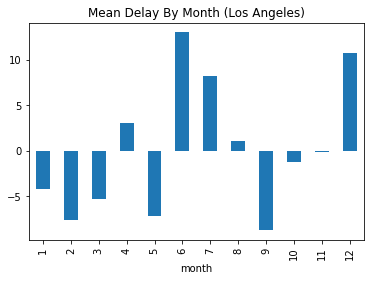

In [9]:
mean_delay_by_month_lax = df[(df.dest == 'LAX')].groupby(['month'])['arr_delay'].mean()
print("Flights to Los Angeles (LAX)")
print(mean_delay_by_month_lax)

mean_month_plt_lax = mean_delay_by_month_lax.plot(kind='bar', title="Mean Delay By Month (Los Angeles)")
mean_month_plt_lax

Perhaps we would like to see which Airline carrier is the best for delays.  Here we have some plots to do that.

Text(0.5, 1.0, 'Average Departure Delay by Carrier in 2008, All  airports')

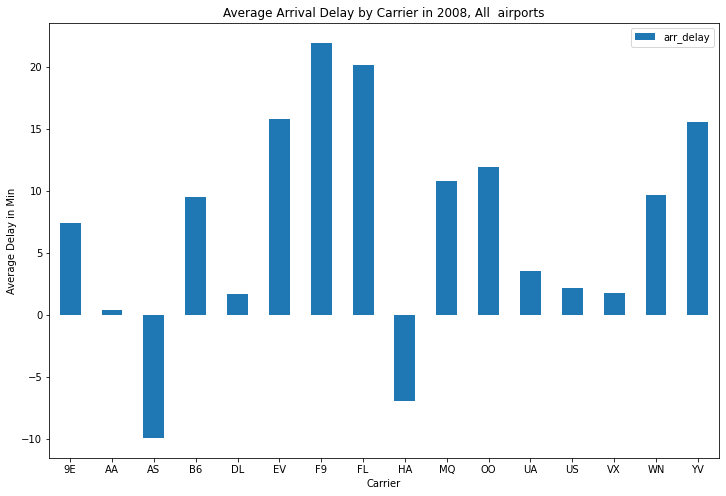

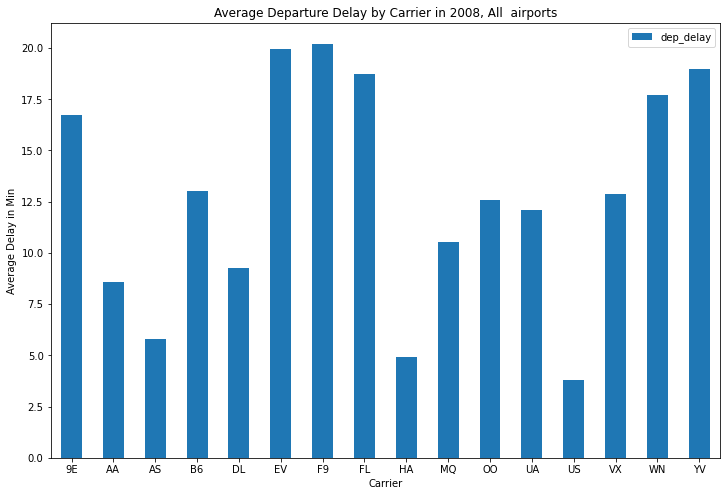

In [10]:
# Examine if specific carrier will create different delay impact
df[['carrier','arr_delay']].groupby('carrier').mean().plot(kind='bar', figsize =(12,8))
plt.xticks(rotation=0)
plt.xlabel('Carrier')
plt.ylabel('Average Delay in Min')
plt.title('Average Arrival Delay by Carrier in 2008, All  airports')


df[['carrier','dep_delay']].groupby('carrier').mean().plot(kind='bar', figsize =(12,8))
plt.xticks(rotation=0)
plt.xlabel('Carrier')
plt.ylabel('Average Delay in Min')
plt.title('Average Departure Delay by Carrier in 2008, All  airports')

F9 (Frontier Airlines) is among the Max in terms of delays
Hawaiian (HA) is among the best (min).

### Other Tables:
Consider the other tables in the Dataset

In [12]:
weather = pd.read_csv('https://s3.amazonaws.com/elephantscale-public/data/nycflights13/airports.csv.gz')
weather.shape

(1458, 8)

In [13]:
weather.head(3)

,faa,name,lat,lon,alt,tz,dst,tzone
0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago
2,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A,America/Chicago


In [23]:
weather.columns

Index(['faa', 'name', 'lat', 'lon', 'alt', 'tz', 'dst', 'tzone'], dtype='object')

In [14]:
airports = pd.read_csv('https://s3.amazonaws.com/elephantscale-public/data/nycflights13/airports.csv.gz')
airports.shape

(1458, 8)

In [15]:
airports.head(4)

,faa,name,lat,lon,alt,tz,dst,tzone
0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago
2,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A,America/Chicago
3,06N,Randall Airport,41.431912,-74.391561,523,-5,A,America/New_York


### Join
Merge the airport and weather to the actual df

In [18]:
df.columns

Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour'],
      dtype='object')

In [22]:
df_withweather = pd.merge(df, weather, how='left', left_on="year", right_on="Origin")
df_withweather.head(3)

KeyError: ignored

Unfortunately we cannot join. For Join there should be atleast one common columns to map